In [16]:
import os
import pandas as pd
import uproot
import numpy as np

import matplotlib.pyplot as plt

In [9]:
background_files = [
    ("../../outputfiles/hhbbgg_analyzer-v2-trees.root", "/GGJets/preselection"),
]

In [14]:
keys = ['lead_pho_mvaID']

dfs = {}

for file, key in background_files:
    try: 
        with uproot.open(file) as f:
            dfs[key] = f[key].arrays(keys, library="pd")
    except:
        print(f"Error loading {file} with key {key}: {e}")


df = dfs.get("/GGJets/preselection")

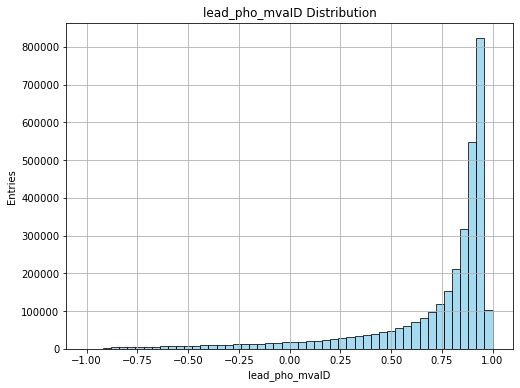

In [17]:
# Check if we successfully loaded the DataFrame
if df is not None:
    # Plot the histogram
    plt.figure(figsize=(8, 6))
    plt.hist(df['lead_pho_mvaID'], bins=50, range=(-1, 1), alpha=0.75, color='skyblue', edgecolor='black')
    plt.title("lead_pho_mvaID Distribution")
    plt.xlabel("lead_pho_mvaID")
    plt.ylabel("Entries")
    plt.grid(True)
    plt.show()
else:
    print("DataFrame not loaded.")

In [3]:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))


In [4]:
import awkward as ak
import uproot
import numpy as np
import matplotlib.pyplot as plt


In [5]:

ROOT_FILE = "../../outputfiles/hhbbgg_analyzer-v2-trees.root"
TREE_DIR_SUFFIX = "preselection"

In [6]:
DATASETS = [
    "Data_EraE", "Data_EraF", "Data_EraG", "GGJets", "GJetPt20To40", "GJetPt40",
    "GluGluHToGG", "GluGluToHH",
    "NMSSM_X300_Y100", "NMSSM_X300_Y125", "NMSSM_X300_Y150",
    "NMSSM_X400_Y100", "NMSSM_X400_Y125", "NMSSM_X400_Y150",
    "NMSSM_X500_Y100", "NMSSM_X500_Y125", "NMSSM_X500_Y150",
    "QCD_PT-30To40", "QCD_PT-30ToInf", "QCD_PT-40ToInf",
    "ttHToGG", "VBFHToGG", "VHToGG"
]


In [20]:
# 📁 Input ROOT file and dataset
ROOT_FILE = "../../outputfiles/hhbbgg_analyzer-v2-trees.root"
DATASET = "GJetPt40"  # change this to analyze other datasets

# 🗂 Tree paths based on dataset
tree_path_tight = f"{DATASET}/idmva_presel"
tree_path_loose = f"{DATASET}/idmva_sideband"

# 📥 Load m(γγ) from both regions
def load_diphoton_mass(file, tree_path):
    print(f"Loading {tree_path}")
    with uproot.open(file) as f:
        return f[tree_path]["diphoton_mass"].array(library="ak")

mgg_tight = load_diphoton_mass(ROOT_FILE, tree_path_tight)
mgg_loose = load_diphoton_mass(ROOT_FILE, tree_path_loose)


Loading GJetPt40/idmva_presel
Loading GJetPt40/idmva_sideband


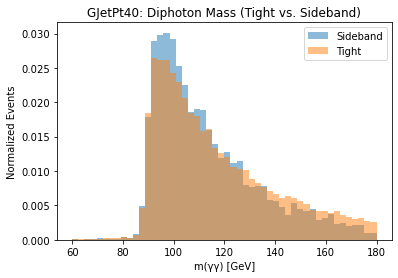

In [21]:
plt.hist(ak.to_numpy(mgg_loose), bins=50, range=(60, 180), alpha=0.5, label="Sideband", density=True)
plt.hist(ak.to_numpy(mgg_tight), bins=50, range=(60, 180), alpha=0.5, label="Tight", density=True)
plt.xlabel("m(γγ) [GeV]")
plt.ylabel("Normalized Events")
plt.title(f"{DATASET}: Diphoton Mass (Tight vs. Sideband)")
plt.legend()
plt.show()



In [22]:
# 📊 TF and SR estimation
def in_window(x, low, high):
    return (x > low) & (x < high)

sideband_mask = in_window(mgg_loose, 90, 120) | in_window(mgg_loose, 130, 180)
sb_loose = mgg_loose[sideband_mask]

sideband_mask_tight = in_window(mgg_tight, 90, 120) | in_window(mgg_tight, 130, 180)
sb_tight = mgg_tight[sideband_mask_tight]

TF = len(sb_tight) / len(sb_loose) if len(sb_loose) > 0 else 0

sr_mask = in_window(mgg_loose, 120, 130)
sr_loose = mgg_loose[sr_mask]

estimated_bkg = TF * len(sr_loose)

print(f"[{DATASET}] Transfer factor (tight/loose): {TF:.3f}")
print(f"[{DATASET}] Estimated background in 120–130 GeV: {estimated_bkg:.1f} events")


[GJetPt40] Transfer factor (tight/loose): 5.613
[GJetPt40] Estimated background in 120–130 GeV: 3210.6 events


# keys


In [16]:
import uproot

root_file_path = "../../outputfiles/hhbbgg_analyzer-v2-trees.root"
with uproot.open(root_file_path) as file:
    keys = list(file.keys())
    print(keys)


['processed_events;1', 'GJetPt20To40;1', 'GJetPt20To40/preselection;1', 'GJetPt20To40/selection;1', 'GJetPt20To40/srbbgg;1', 'GJetPt20To40/srbbggMET;1', 'GJetPt20To40/crantibbgg;1', 'GJetPt20To40/crbbantigg;1', 'GJetPt20To40/crantibbantigg;1', 'GJetPt20To40/sideband;1', 'GJetPt20To40/idmva_sideband;1', 'GJetPt20To40/idmva_presel;1', 'processed_events;2', 'GJetPt40;1', 'GJetPt40/preselection;1', 'GJetPt40/selection;1', 'GJetPt40/srbbgg;1', 'GJetPt40/srbbggMET;1', 'GJetPt40/crantibbgg;1', 'GJetPt40/crbbantigg;1', 'GJetPt40/crantibbantigg;1', 'GJetPt40/sideband;1', 'GJetPt40/idmva_sideband;1', 'GJetPt40/idmva_presel;1', 'processed_events;3', 'GluGluHToGG;1', 'GluGluHToGG/preselection;1', 'GluGluHToGG/selection;1', 'GluGluHToGG/srbbgg;1', 'GluGluHToGG/srbbggMET;1', 'GluGluHToGG/crantibbgg;1', 'GluGluHToGG/crbbantigg;1', 'GluGluHToGG/crantibbantigg;1', 'GluGluHToGG/sideband;1', 'GluGluHToGG/idmva_sideband;1', 'GluGluHToGG/idmva_presel;1', 'processed_events;4', 'ttHToGG;1', 'ttHToGG/preselec